In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss

In [2]:
# Loading train and test set

with open('dataset_dict.pickle', 'rb') as file:
    loaded_data = pickle.load(file)

X_train_loaded = loaded_data["X_train"]
X_test_loaded = loaded_data["X_test"]
y_train_loaded = loaded_data["y_train"]
y_test_loaded = loaded_data["y_test"]

In [3]:
X_train_loaded.shape, X_test_loaded.shape

((6204669, 362), (1551168, 362))

In [4]:
y_train_loaded.shape, y_test_loaded.shape

((6204669,), (1551168,))

In [5]:
X_train_loaded.dtypes, X_test_loaded.dtypes

(YEAR              int16
 MONTH             int16
 DAY               int16
 DAY_OF_WEEK       int16
 DEPARTURE_TIME    int16
                   ...  
 IATA_CODE_WRG      bool
 IATA_CODE_WYS      bool
 IATA_CODE_XNA      bool
 IATA_CODE_YAK      bool
 IATA_CODE_YUM      bool
 Length: 362, dtype: object,
 YEAR              int16
 MONTH             int16
 DAY               int16
 DAY_OF_WEEK       int16
 DEPARTURE_TIME    int16
                   ...  
 IATA_CODE_WRG      bool
 IATA_CODE_WYS      bool
 IATA_CODE_XNA      bool
 IATA_CODE_YAK      bool
 IATA_CODE_YUM      bool
 Length: 362, dtype: object)

In [6]:
y_train_loaded.dtypes,y_test_loaded.dtypes

(dtype('int16'), dtype('int16'))

In [7]:
# Defining a Linear Regression model

LR = LinearRegression()

In [8]:
LR.fit(X_train_loaded,y_train_loaded)

LinearRegression()

In [9]:
predictions = LR.predict(X_test_loaded)

print("Coefficients:", LR.coef_)
print("Intercept:", LR.intercept_)
print("Predicted value for [X_test_loaded]:", predictions)

Coefficients: [ 1.14215352e-02 -8.94772646e-04 -4.38230018e-05 -6.45154505e-04
 -1.72950386e-04  1.73754641e-04 -2.20299698e-05  5.77582105e-05
  9.08039510e-09 -1.69235677e-03  2.16183858e-03 -1.09955028e-03
  5.94770972e-05  4.12639754e-04  9.26584180e-04 -4.30987716e-01
 -2.11924198e-05 -3.67707107e-05 -9.26212742e-05  6.11340953e-03
 -9.74549621e-04  1.28052533e-02  7.57875526e-03 -8.09776690e-03
 -1.03037553e-02 -1.36500516e-04  1.87132077e-03  9.39243101e-03
 -3.22288764e-03  3.14896507e-03  7.73527368e-04  4.75209393e-03
  2.85387156e-03  8.08459613e-03 -1.66816649e-03 -6.62245275e-03
  6.91086426e-03  2.14439561e-03  1.59263366e-03 -5.99437160e-03
 -2.62595527e-02 -9.05050989e-03  7.66782761e-02 -4.61653620e-03
 -4.48746644e-02  1.13785267e-03  1.12125594e-02 -1.01836706e-02
  1.56536605e-02 -7.62636657e-04 -1.69860236e-02 -2.88651921e-02
  4.89494950e-03 -6.88600540e-03 -2.06884779e-02  1.68420374e-03
  5.55016473e-03 -4.78305891e-02 -4.80338819e-02 -2.52768025e-02
 -2.3238124

In [10]:
r2_score(y_test_loaded, predictions)

0.6412570250364651

In [12]:
mean_absolute_error(y_test_loaded, predictions), np.sqrt(mean_squared_error(y_test_loaded, predictions))

(0.032264605, 0.064389445)

In [13]:
# Defining a Decisiontree model

Dt = DecisionTreeRegressor(max_depth = 2)

In [14]:
# Fitting Dt_pipeline

Dt.fit(X_train_loaded,y_train_loaded)

DecisionTreeRegressor(max_depth=2)

In [15]:
pred = Dt.predict(X_test_loaded)

In [16]:
r2_score(y_test_loaded, pred)

0.9905311145772324

In [17]:
mean_absolute_error(y_test_loaded, pred), np.sqrt(mean_squared_error(y_test_loaded, pred))

(0.00022682374594513373, 0.010460981871702324)

In [18]:
RF= RandomForestClassifier(n_estimators = 8)

In [19]:
RF_MODEL= RF.fit(X_train_loaded,y_train_loaded)

In [20]:
y_pred = RF_MODEL.predict(X_test_loaded)
y_pred_prob = RF_MODEL.predict_proba(X_test_loaded)


# Assessing RF model

ac = accuracy_score(y_test_loaded, y_pred)

f1 = f1_score(y_test_loaded, y_pred, average='weighted')
cm = confusion_matrix(y_test_loaded, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=1.000
Random Forest: f1-score=1.000


In [21]:
# Printing confusion matrix

print(cm)

[[1533028       1]
 [     14   18125]]


In [22]:
# Printing Classification Report
class_report = classification_report(y_test_loaded, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1533029
           1       1.00      1.00      1.00     18139

    accuracy                           1.00   1551168
   macro avg       1.00      1.00      1.00   1551168
weighted avg       1.00      1.00      1.00   1551168



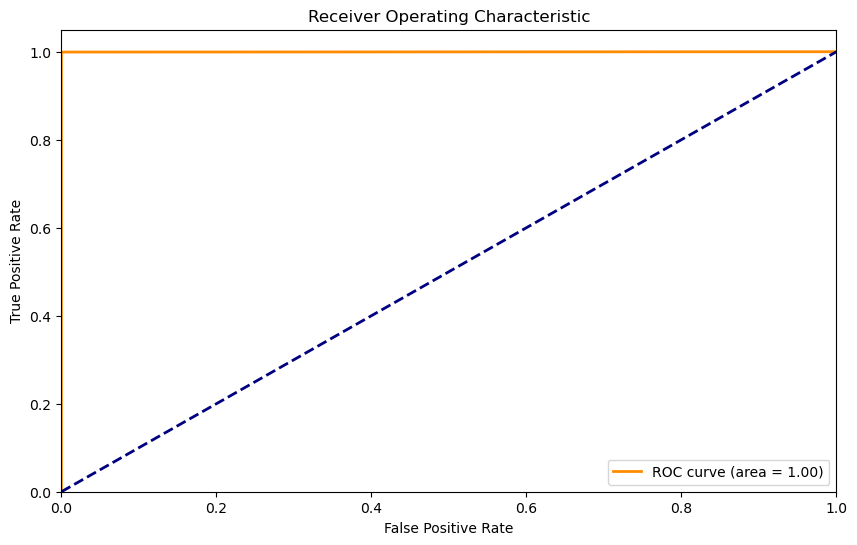

In [23]:
# Determining the Area under the curve.

y_score = RF_MODEL.predict_proba(X_test_loaded)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_loaded, y_pred, pos_label= 1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

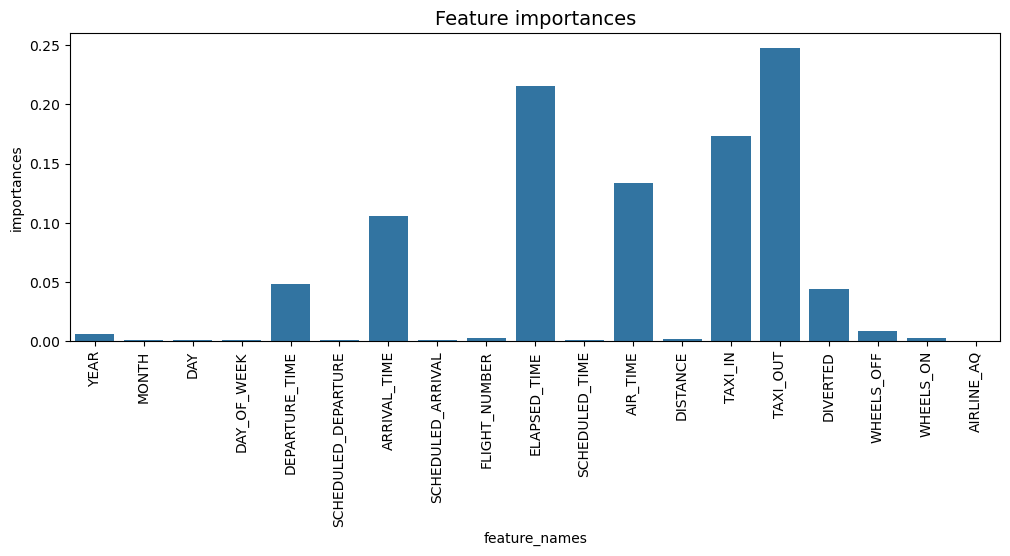

In [24]:
# Feature Importance
importances_df = pd.DataFrame({"feature_names" : RF_MODEL.feature_names_in_, 
                               "importances" : RF_MODEL.feature_importances_})
                             
# Plotting bar chart, g is from graph
plt.figure(figsize=(12, 4))
g = sns.barplot(x=importances_df["feature_names"][:19], 
                y=importances_df["importances"][:19])
plt.xticks(rotation=90)
g.set_title("Feature importances", fontsize=14);

** Summary**

The first model created to predict flight cancelllation was Linear Regression model.Evaluating the performance of this model showed an r-squared score of 0.6412570250364651 and a mean absolute error of 0.032264605 as well as a mean squared error of 0.064389445.

The second model was a decision tree regressor with maximum depth of 2. The r-squared score of this model was 0.9905311145772324 which indicates that accuracy of the prediction of this model is better than the Linear model. The mean absolute error was 0.00022682374594513373 and the mean squared error was also  0.010460981871702324 which are smaller than the previous model.

The third model was a random forest classifier model. It has n_estimators parameter set at 8. The accuracy of this model was 1 and the f1-score was 1.From the confusion matrix and the classification report it is clear that there is class imbalance however thr precision and recall scores are good which further proves that the model is performing well.The ROC curve further shows the diagnostic ability of the model. With the area under the curve value of 1, the model is able to rank a randomly positive instance higher than a randomly negative instance.The most imporatnt feature of this model is the taxi in feature followed by air time, departure time and taxi out.

Of these three models, the Random Forest model performed the best.